# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### Print working directory

In [79]:
pwd

'C:\\Users\\user\\Supermarket-data-analysis\\Data-Analysis-Project'

#### To-Do - Import Libraries

In [80]:
import os
import glob
import pandas as pd
os.chdir('C:\\Users\\user\\Supermarket-data-analysis\\Data-Analysis-Project') 
# Current working directory that contains your dataset and code file

#### To-Do - Use glob to match the pattern "csv"

In [81]:
# Match the pattern "csv"
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [82]:
# Combine all the files
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])

#Export to csv
combined_csv.to_csv("combined_csv.csv", index = False, encoding = 'utf-8-sig')

#### To-Do -Read the CSV file using `pd.read_csv` method

In [83]:
# Read the CSV File
df = pd.read_csv('combined_csv.csv')

In [84]:
# Return first few rows
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [86]:
#[Write your Code Here]
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [87]:
# Check the number of rows and columns
df.shape

(1000, 17)

#### To-Do - Generate the names of the columns using the columns attribute.

In [88]:
# The name of the columns
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [89]:
# Statistical summary
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


In [90]:
# to describe all variables
df.describe(include = 'all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1.000000e+03,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,439-54-7422,A,Lagos,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Epay,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,20041.966800,5.510000,5536.572840,116268.029640,NaN,NaN,NaN,110731.456800,4.761905e+00,5536.572840,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,9538.066205,2.923431,4215.177173,88518.720636,NaN,NaN,NaN,84303.543463,6.131498e-14,4215.177173,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,3628.800000,1.000000,183.060000,3844.260000,NaN,NaN,NaN,3661.200000,4.761905e+00,183.060000,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,11835.000000,3.000000,2132.955000,44792.055000,NaN,NaN,NaN,42659.100000,4.761905e+00,2132.955000,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,19882.800000,5.000000,4351.680000,91385.280000,NaN,NaN,NaN,87033.600000,4.761905e+00,4351.680000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,28056.600000,8.000000,8080.290000,169686.090000,NaN,NaN,NaN,161605.800000,4.761905e+00,8080.290000,8.50000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

### Data statistical summary
* All the columns have the same number of rows and the count is the same for all columns - 1000.
* The standard deviation of the columns are not too low, and hence the values of the datasets does not deviate much from the mean.
* 25% of customers made a Total purchase of N44792 and below, while the gross income made from 25% of customers was N2153 and below
* Also, 75% of customers made a Total purchase of N169686  and below, while the gross income made from 75% of customers was N8080 and below.
* From the Minimum and Maximum, we can say that the total purchase ranges from N3844 - N375354, while the gross income ranges from N183 - N17874.
* The minimum and the maximum ratings also ranges from 4 - 10, which denote that the minimum level of satisfaction experienced by customers is 4/10, while the maximum is 10.

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [91]:
#[Write your Code Here]
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [92]:
df.notna().sum()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [93]:
#[Write your Code Here]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

* There are no missing values in the dataset
* There are 1000 rows and 17 columns
* The maximum rating is 10, the minimum rating is 4, the average Quantity is 5.5

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [94]:
# convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [95]:
df['Time'] = pd.to_datetime(df['Time'])

In [96]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2021-07-08 13:27:00,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2021-07-08 18:07:00,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2021-07-08 17:03:00,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2021-07-08 16:19:00,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2021-07-08 15:30:00,Epay,29016.0,4.761905,1450.80,4.4


#### To-Do - Check the datatype to confirm if it's in `datetime`

In [97]:
# Check datatype
df['Date'].dtype

dtype('<M8[ns]')

#### To-Do - Repeat the two steps above to the `time` column

In [98]:
# Convert to date time
df['Time'] = pd.to_datetime(df['Time'])

In [99]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2021-07-08 13:27:00,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2021-07-08 18:07:00,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2021-07-08 17:03:00,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2021-07-08 16:19:00,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2021-07-08 15:30:00,Epay,29016.0,4.761905,1450.80,4.4


In [100]:
df['Time'].dtype

dtype('<M8[ns]')

## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [101]:
Date = df['Date'] = pd.to_datetime(df['Date'])

In [102]:
Date

0     2019-02-20
1     2019-02-06
2     2019-03-09
3     2019-01-15
4     2019-03-11
         ...    
995   2019-01-23
996   2019-01-09
997   2019-03-29
998   2019-02-18
999   2019-01-29
Name: Date, Length: 1000, dtype: datetime64[ns]

In [103]:
# Extract Day from Date
df['day'] = df['Date'].dt.day

In [104]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2021-07-08 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2021-07-08 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2021-07-08 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2021-07-08 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2021-07-08 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11


#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [105]:
# Extract month from Date
df['month'] = df['Date'].dt.month

In [106]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2021-07-08 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2021-07-08 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2021-07-08 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2021-07-08 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2021-07-08 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3


#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [107]:
# Extract year from Date
df['year'] = df['Date'].dt.year

In [108]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2021-07-08 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2021-07-08 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2021-07-08 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2021-07-08 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2021-07-08 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019


#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [109]:
Time = df['Time'] = pd.to_datetime(df['Time'])

In [110]:
Time

0     2021-07-08 13:27:00
1     2021-07-08 18:07:00
2     2021-07-08 17:03:00
3     2021-07-08 16:19:00
4     2021-07-08 15:30:00
              ...        
995   2021-07-08 10:33:00
996   2021-07-08 11:40:00
997   2021-07-08 19:12:00
998   2021-07-08 11:40:00
999   2021-07-08 13:46:00
Name: Time, Length: 1000, dtype: datetime64[ns]

In [111]:
# Extract hour from Time
df['hour'] = df['Time'].dt.hour

In [112]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2021-07-08 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2021-07-08 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2021-07-08 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2021-07-08 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2021-07-08 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [113]:
df_hour = df['hour'] = df['Time'].dt.hour

In [114]:
# Number of unique values
df_hour.nunique(dropna = True)

11

In [115]:
#[Write your Code Here]
ser = pd.Series(df_hour)

In [116]:
ser

0      13
1      18
2      17
3      16
4      15
       ..
995    10
996    11
997    19
998    11
999    13
Name: Time, Length: 1000, dtype: int64

In [117]:
# arrays of unique values
ser.unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [118]:
#Uncomment the code and Run it
categorical_columns = [col for col in df.columns if df[col].dtype == "object" ]

In [119]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [120]:
#Example
df['Branch'].unique().tolist()

['B', 'A', 'C']

In [121]:
print("Total Number of unique values in the Branch Column : {}". format(len(df['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [122]:
for i in categorical_columns:
    if i != 'Invoice ID':
        print ("This is for {} columns".format(i))
        print (df[i].unique().tolist())
        print("Total Number of unique value: {}".format(len(df[i].unique().tolist())))

This is for Branch columns
['B', 'A', 'C']
Total Number of unique value: 3
This is for City columns
['Abuja', 'Lagos', 'Port Harcourt']
Total Number of unique value: 3
This is for Customer type columns
['Member', 'Normal']
Total Number of unique value: 2
This is for Gender columns
['Female', 'Male']
Total Number of unique value: 2
This is for Product line columns
['Food and beverages', 'Fashion accessories', 'Electronic accessories', 'Sports and travel', 'Home and lifestyle', 'Health and beauty']
Total Number of unique value: 6
This is for Payment columns
['Card', 'Epay', 'Cash']
Total Number of unique value: 3


#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [123]:
# count of values
df['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [124]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [125]:
df['Invoice ID'].value_counts()

439-54-7422    1
672-51-8681    1
583-72-1480    1
226-31-3081    1
427-45-9297    1
              ..
651-88-7328    1
472-15-9636    1
734-91-1155    1
559-61-5987    1
534-01-4457    1
Name: Invoice ID, Length: 1000, dtype: int64

In [126]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [127]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [128]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [129]:
df['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [130]:
# create city groupby
City = df.groupby('City')

In [131]:
type(City)

pandas.core.groupby.generic.DataFrameGroupBy

In [132]:
# aggregation function of sum and mean
City.agg(['sum', 'mean'])

Unit price               Quantity                Tax 5%  \
                     sum          mean      sum      mean         sum   
City                                                                    
Abuja          6652396.8  20037.339759     1820  5.481928  1820531.52   
Lagos          6705176.4  19721.107059     1859  5.467647  1820577.78   
Port Harcourt  6684393.6  20379.248780     1831  5.582317  1895463.54   

                                  Total                       cogs  \
                      mean          sum           mean         sum   
City                                                                 
Abuja          5483.528675  38231161.92  115154.102169  36410630.4   
Lagos          5354.640529  38232133.38  112447.451118  36411555.6   
Port Harcourt  5778.852256  39804734.34  121355.897378  37909270.8   

                              ...  Rating             day            month  \
                        mean  ...     sum      mean   sum       mean   sum   
City                          ...                                            
Abuja          109670.573494  ...  2263.6  6.818072  5068  15.265060   665   
Lagos          107092.810588  ...  2389.2  7.027059  5232  15.388235   688   
Port Harcourt  115577.045122  ...  2319.9  7.072866  4956  15.109756   640   

                           year        hour             
                   mean     sum  mean   sum       mean  
City                                                    
Abuja          2.003012  670308  2019  5029  15.147590  
Lagos          2.023529  686460  2019  4987  14.667647  
Port Harcourt  1.951220  662232  2019  4894  14.920732  

[3 rows x 24 columns]

In [133]:
City.size()

City
Abuja            332
Lagos            340
Port Harcourt    328
dtype: int64

#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [134]:
gross_income = City['gross income'].sum().reset_index()

In [135]:
gross_income

,City,gross income
0,Abuja,1820531.52
1,Lagos,1820577.78
2,Port Harcourt,1895463.54


In [136]:
# [Write your Answer Here]
gross_income.max().reset_index()

,index,0
0,City,Port Harcourt
1,gross income,1895463.54


### Portharcourt has the highest gross income

In [137]:
# Optional - You can explore other columns such as "Unit Price", "Quantity" etc. 
other_columns = City['Unit price', 'Quantity', 'gross margin percentage'].sum()

In [138]:
other_columns

,Unit price,Quantity,gross margin percentage
City,,,
Abuja,6652396.8,1820,1580.952381
Lagos,6705176.4,1859,1619.047619
Port Harcourt,6684393.6,1831,1561.904762


In [139]:
prod = df[['Product line', 'gross income']]

In [140]:
prod_group = prod.groupby('Product line').sum().reset_index().sort_values(['gross income'], ascending = False)

In [141]:
prod_group

,Product line,gross income
2,Food and beverages,962483.04
5,Sports and travel,944962.74
0,Electronic accessories,931500.54
1,Fashion accessories,930958.20
4,Home and lifestyle,923347.08
3,Health and beauty,843321.24


### Food and beverages has the highest gross income, while Health and Beauty experienced the lowest.

In [142]:
prod = df[['Branch', 'Quantity']]
prod_group = prod.groupby('Branch').sum().reset_index().sort_values(['Quantity'], ascending = False)
prod_group

,Branch,Quantity
0,A,1859
2,C,1831
1,B,1820


### Branch A sold higher quantity, while Branch B sold the least quantity.

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

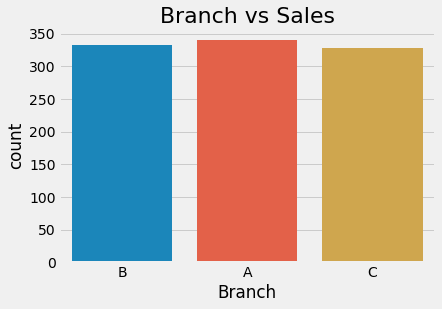

In [144]:
sns.countplot(x = 'Branch', data = df).set_title('Branch vs Sales', size = 22);

### From the plot, Branch A has higher sales.

#### Explore a countplot for the `Payment` and `City` Column

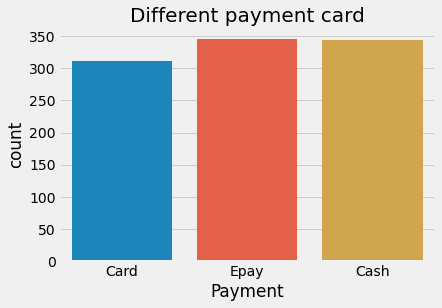

In [145]:
sns.countplot(x = 'Payment', data = df).set_title('Different payment card', size = 20);

### The most used payment method is Epay Payment, while the least used is Card.

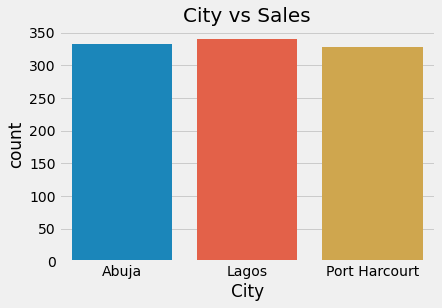

In [146]:
sns.countplot(x = 'City', data = df).set_title('City vs Sales', size = 20);

### - Lagos City has the highest sales, while Portharcourt has the least.

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

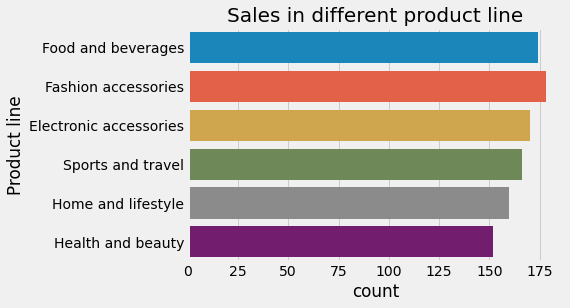

In [147]:
#[Write your Code Here]
sns.countplot(y = 'Product line', data = df).set_title('Sales in different product line', size = 20);

### - Fashion accessories has the highest sales, while Health and beauty has the least.

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

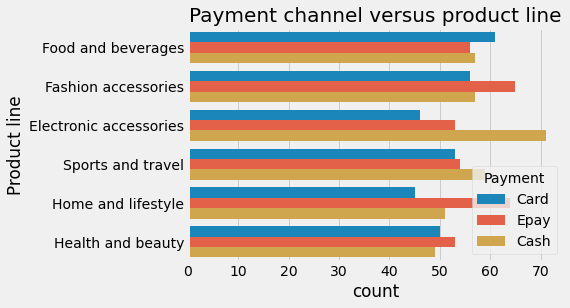

In [148]:
#[Write your Code Here]
sns.countplot(y = 'Product line', hue = 'Payment', data = df).set_title('Payment channel versus product line', size = 20);

#### Card - Food and beverages
#### Epay - Fashion accessories, Home and lifestyle, Health and Beauty
#### Cash - Electronic accessories and Sports and travel.

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

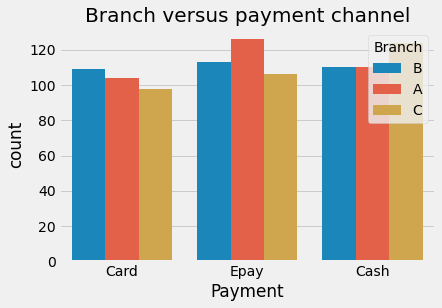

In [149]:
#[Write your Code Here]
sns.countplot(x = 'Payment', hue = 'Branch', data = df).set_title('Branch versus payment channel', size = 20);

#### The most used payment method in each branch:
Branch A - E payment
Branch B - Card
Branch C - Cash

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

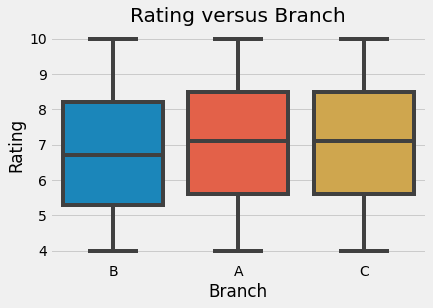

In [150]:
#[Write your Code Here]
sns.boxplot(x = 'Branch', y = 'Rating', data = df).set_title('Rating versus Branch');

#[Write your answer here]
The branch with the lowest rating is Branch B(1st quartile)

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

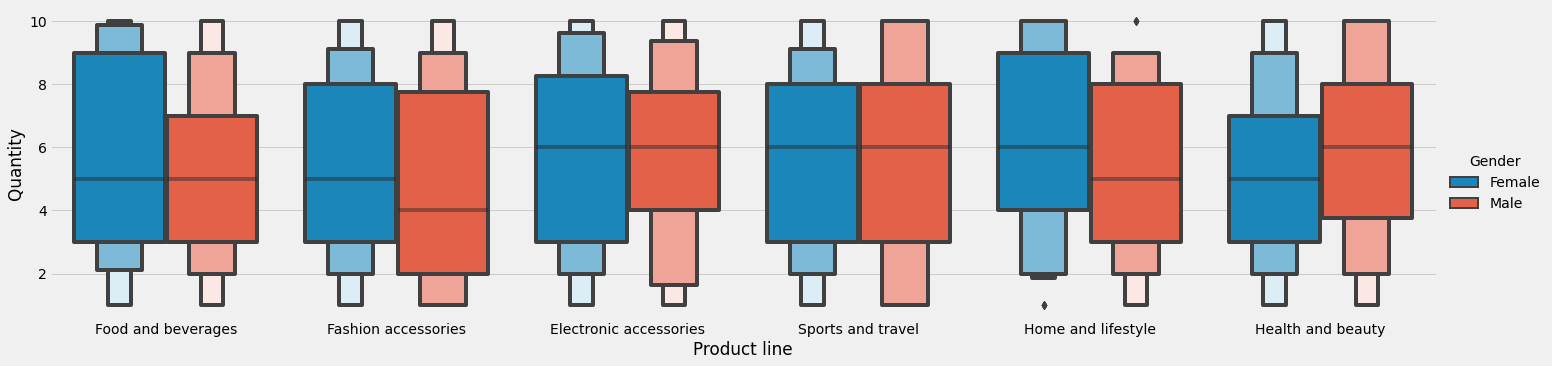

In [151]:
#[Write your Code Here]
sns.catplot(x = 'Product line', y = 'Quantity', hue = 'Gender', data = df, aspect = 4, kind = 'boxen');

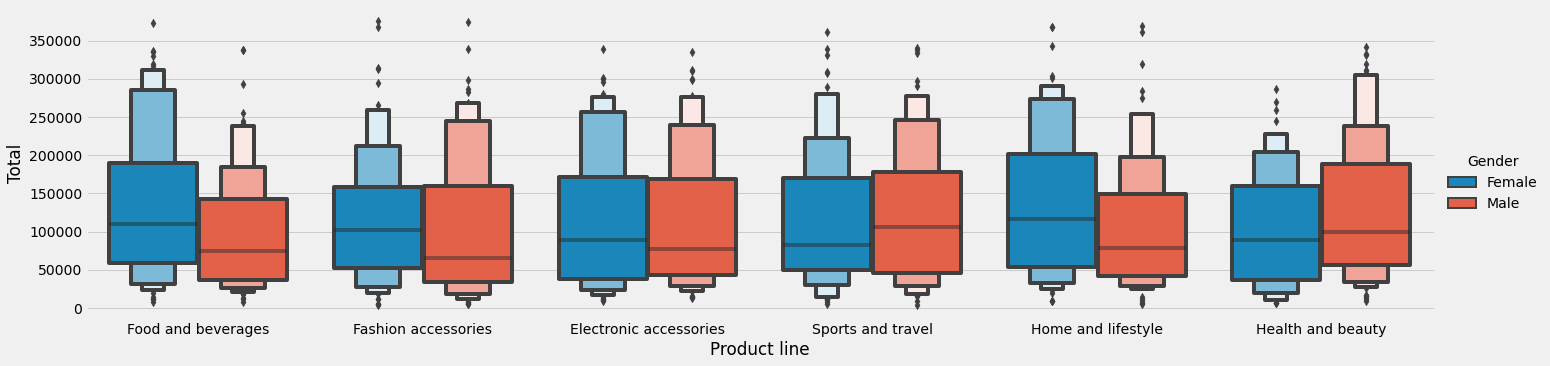

In [152]:
#[Write your Code Here]
sns.catplot(x = 'Product line', y = 'Total', hue = 'Gender', data = df, aspect = 4, kind = 'boxen');

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

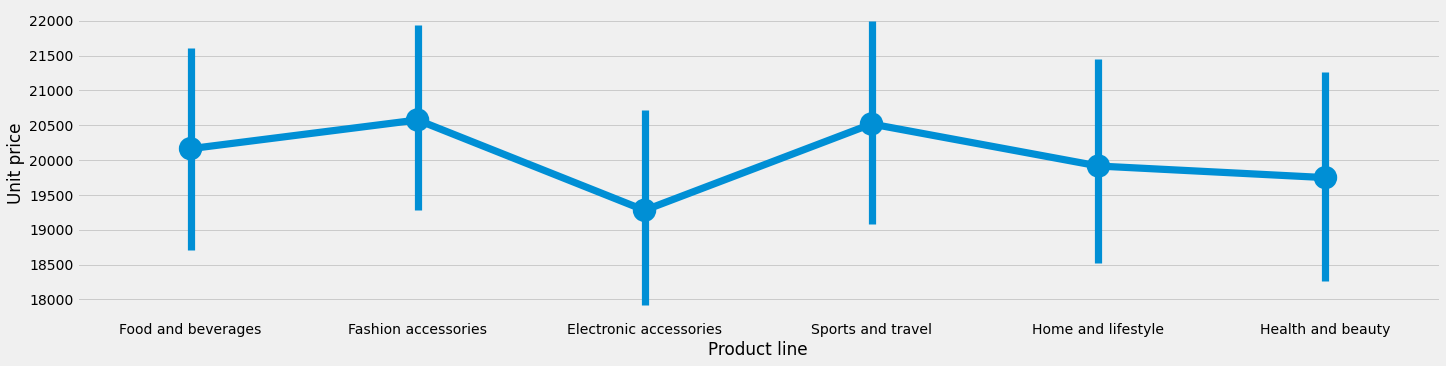

In [153]:
#[Write your Code Here]
sns.catplot(x = 'Product line', y = 'Unit price', kind = 'point', data = df, aspect = 4);

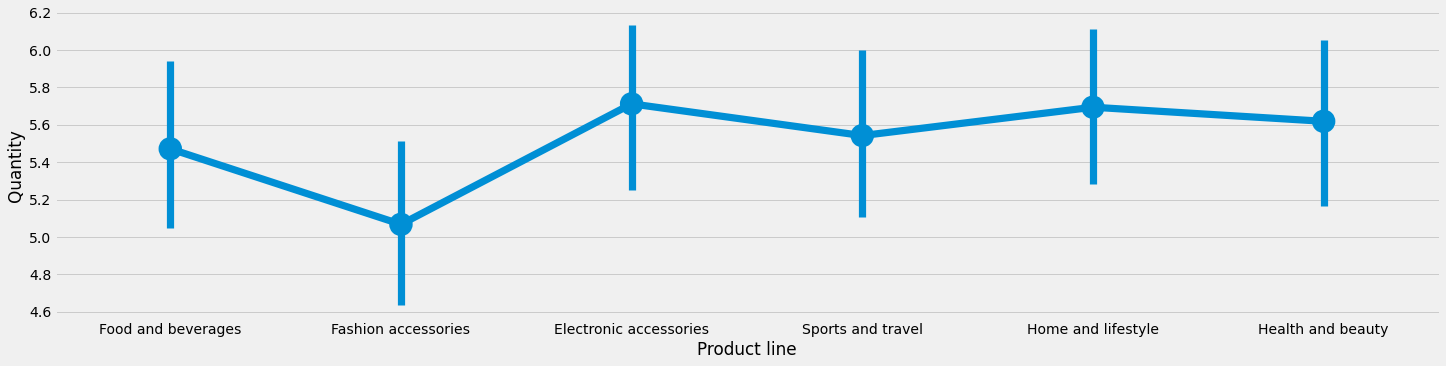

In [154]:
#[Write your Code Here]
sns.catplot(x = 'Product line', y = 'Quantity', kind = 'point', data = df, aspect = 4);

* Fashion accessories has the highest unit price but lowest quantity
* Electronic accessories has the lowest unit price but highest Quantity

sns.countplot(x = 'Payment', data = df, hue = 'Gender').set_title('Gender vs Payment method');

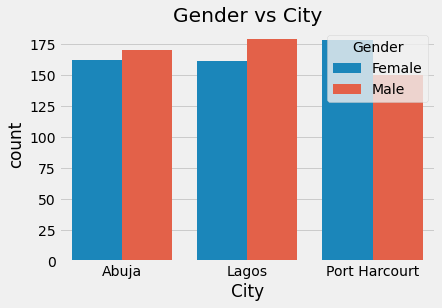

In [155]:
sns.countplot(x = 'City', data = df, hue = 'Gender').set_title('Gender vs City');

### Males have Higher purchase in Abuja and Lagos City, while females purchase more in portharcout.

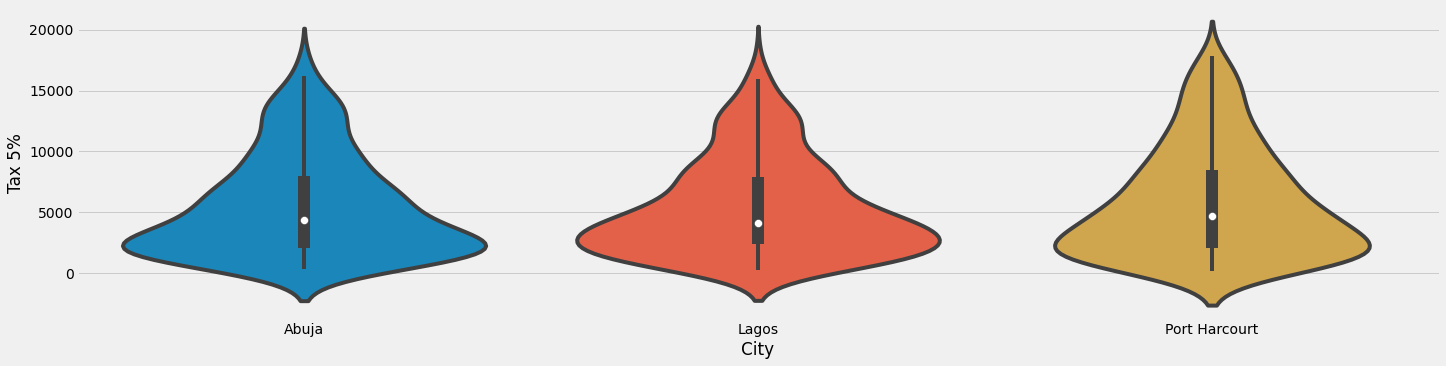

In [156]:
sns.catplot(x = 'City', y = 'Tax 5%', kind = 'violin', data = df, aspect = 4);

### Port-harcourt pays the highest Tax

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 